In [1]:
import os,sys
os.chdir('../')
sys.path.append('./src/probability')
sys.path.append('./src/data')
sys.path.append('./src/events')
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from IC.processer import *
from IC.importer import *
from IC.main import integrate
res = get_IC_data()
Ereco = 500*10**(np.linspace(0.0,1.3,14))
model = train_energy_resolution(False)
ztrue = np.linspace(-1,0,100)
interp_flux = interpolate_flux(False)
aeff_list = interpolate_aeff(False)

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [42]:
df = pd.read_csv('~/NuFSGenMC_nominal.dat', header=None, skiprows=12,delimiter=' ', names=['pdg','reco_energy', 'reco_coszen','true_energy','true_coszen','weight', 'flux1','flux2']).query('reco_energy > 500 and reco_energy < 10000')

In [27]:
grouped_df = df.groupby(['reco_energy', 'true_energy']).sum()

,pdg,reco_energy,reco_coszen,true_energy,true_coszen,weight,flux1,flux2
0,-13,689.2225,-0.979026,494.8771,-0.979215,1.717731e+07,4.539741e-11,4.621899e-11
1,13,2705.2740,-0.194269,12439.6900,-0.186481,1.245700e+11,1.636852e-15,6.698746e-15
2,-13,2969.8830,-0.327984,2986.8660,-0.357066,2.406686e+09,1.543665e-13,2.908331e-13
3,13,1395.9700,-0.619641,4622.8970,-0.621212,1.243563e+10,2.026703e-14,8.488414e-14
4,13,2238.9330,-0.805304,5967.7290,-0.806822,2.643217e+10,5.841866e-15,2.645876e-14
...,...,...,...,...,...,...,...,...
8784612,13,1098.5200,-0.845367,1906.8060,-0.841548,6.114175e+08,3.920014e-13,1.431658e-12
8784613,13,1279.2490,-0.021712,1715.3310,-0.020740,2.745023e+09,3.802741e-12,4.867093e-12
8784614,-13,1572.5630,-0.306840,724.5060,-0.298991,7.348430e+06,2.828133e-11,2.395735e-11
8784615,-13,773.8640,-0.057704,385.4801,-0.062174,2.091010e+06,3.040176e-10,3.093614e-10


In [43]:
sample_df = df.sample(100000)

Text(0, 0.5, '$E^\\text{true}$ [GeV]')

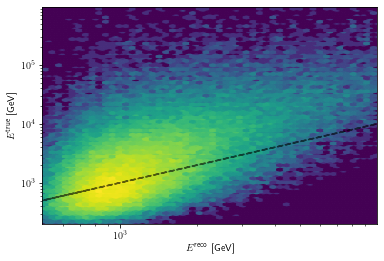

In [53]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.hexbin(sample_df.reco_energy, sample_df.true_energy, xscale='log', yscale='log', gridsize=(50,50), bins='log')
plt.plot(sample_df.reco_energy, sample_df.reco_energy, ls = '--',alpha = 0.6, c='black')
plt.ylim(sample_df.true_energy.min(), sample_df.true_energy.max())
plt.xlim(sample_df.reco_energy.min(), sample_df.reco_energy.max())
plt.xlabel(r'$E^\text{reco}$ [GeV]')
plt.ylabel(r'$E^\text{true}$ [GeV]')
#plt.plot(sample_df.true_energy, sample_df.true_energy,c='r')
#plt.xscale('log')
#plt.yscale('log')

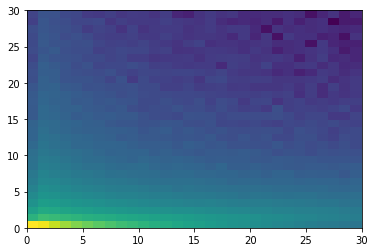

In [21]:
H, xedges, yedges = np.histogram2d(df.true_energy, df.reco_energy, bins=[30,30])

X, Y = np.meshgrid(xedges, yedges)
fig,ax = plt.subplots(1,1)
ax.pcolormesh(np.log10(H))

In [22]:
xidx = np.clip(np.digitize(df.true_energy, xedges), 0, H.shape[0]-1)
yidx = np.clip(np.digitize(df.reco_energy, yedges), 0, H.shape[1]-1)
c = H[xidx, yidx]
plt.scatter(df.true_energy, df.reco_energy, c=c)

Error in callback <function flush_figures at 0x00000263F685D550> (for post_execute):


KeyboardInterrupt: 

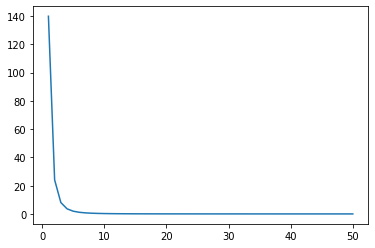

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from dataProcesser import *
from dataImporter import *
from events import integrate
aeff_df = get_aeff_df_dc()
from scipy.interpolate import interp1d
from dataProcesser import get_aeff_dc, interpolate_flux_DC

interp_flux = interpolate_flux_DC(False)
E_range = np.linspace(1,50)
plt.plot(E_range,get_flux('m',E_range,-1,interp_flux))

In [41]:
%matplotlib widget
flavor = 'm'
Etrue,_,_ = get_Etrue(E_index=0,npoints=25, left_alpha=0.95, right_alpha=0.99, model=model)
X,Y = np.meshgrid(Etrue,ztrue)
flux = get_flux(flavor,X,Y,interp_flux)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(X), Y, flux , cmap = 'winter')

#ax.scatter(np.log10(flux_df.GeV),(flux_df.z_min + flux_df.z_max)/2, flux_df.GeV**2*flux_df.m_flux,c='r',s=4)
ax.set_title(r'Interpolated average South Pole atmospheric $\nu_\mu$ flux with Honda data points')
ax.set_xlabel(r'$\log{}E_\nu \,[GeV]$')
ax.set_ylabel(r'$\cos{(\theta_z)}$')
ax.set_zlabel(r'$E_\nu^2\, \phi \, [GeV\,m^{-2}\, sec^{-1}\, sr^{-1}]$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, '$E_\\nu^2\\, \\phi \\, [GeV\\,m^{-2}\\, sec^{-1}\\, sr^{-1}]$')

In [48]:
%matplotlib widget
from dataProcesser import get_aeff, interpolate_aeff, get_Etrue


Etrue,_,_ = get_Etrue(E_index=0,npoints=25, left_alpha=0.95, right_alpha=0.99, model=model)

E_mesh, z_mesh = np.meshgrid(Etrue, ztrue)

aeff_num = get_aeff(False, E_mesh, z_mesh, aeff_list)
aeff_nuam = get_aeff(True, E_mesh, z_mesh, aeff_list)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(E_mesh), z_mesh, np.log10(aeff_num) , cmap = 'winter')
ax.set_title(r'Interpolated effective area [$m^2$]')
ax.set_xlabel(r'$\log{}E_\nu \,[GeV]$')
ax.set_ylabel(r'$\cos{(\theta_z)}$')
ax.set_zlabel(r'$A [m^2]$')
#plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, '$A [m^2]$')

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(E_mesh), z_mesh, aeff_num*flux , cmap = 'winter')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
%matplotlib widget
Etrue,mu_base_e,std_base_e = get_Etrue(E_index=0,npoints=25, left_alpha=0.95, right_alpha=0.99, model=model)

res_num = lognorm.pdf(Etrue, s = std_base_e, scale=np.exp(mu_base_e))

auc = integrate(res_num,'simps',Etrue)

fig = plt.figure()
plt.plot(Etrue,res_num)
plt.axvline(Ereco[0])
plt.axvline(Ereco[1])
plt.title(f'AUC: {np.round(auc,3)}')
plt.xscale('log')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
filename = '~/NuFSGenMC_nominal.dat'
df = pd.read_csv(filename, delimiter=' ', names= ['pdg', 'Ereco', 'zreco', 'Etrue', 'ztrue', 'mcweight', 'flux_pion', 'flux_kaon'], skiprows=12)
df['Ebin'] = pd.cut(df.Ereco, bins=500*10**np.linspace(0.0,1.3,14), labels=False).dropna()
num_mask = (df["pdg"] == 13)
nuam_mask = (df["pdg"] == -13)
pre_model = train_energy_resolution()
small_df = df[num_mask].query('Ereco >500').query('Ereco <9976').head(10000)
X_test = np.array(np.log(small_df.Ereco)).reshape(-1,1)
y_test = np.log(small_df.Etrue)

df_bin0 = small_df.query('Ebin==0.')[['Ereco','Etrue']]
Ereco = np.array(df_bin0.Ereco)
mu_base_e, std_base_e = pre_model.predict(X_test, return_std=True)


Etrue_rvs = lognorm.rvs(s=std_base_e, scale=np.exp(mu_base_e), random_state=0)
plt.figure()
plt.scatter(np.exp(X_test), np.exp(y_test),s=3, alpha=0.5, c='r', label='IC MC')
plt.scatter(np.exp(X_test), Etrue_rvs,s=3, alpha=0.5, c='black', label='My MC')
plt.scatter(np.exp(X_test),lognorm.ppf(1-0.999, s=std_base_e, scale= np.exp(mu_base_e)), c='grey', s=2, label='99.9 percentile')
plt.scatter(np.exp(X_test),lognorm.ppf(0.999, s=std_base_e, scale= np.exp(mu_base_e)), c='grey', s=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ereco')
plt.ylabel('Etrue')
plt.xlim((np.exp(X_test).min(),np.exp(X_test).max()))
plt.ylim((np.exp(y_test).min(),np.exp(y_test).max()))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(201.19719999999995, 921243.9999999999)